<a href="https://colab.research.google.com/github/ZahraEk/Speech/blob/main/EX2_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of windows mfccs : 40
Number of windows mfccs_htk : 20
Length of each feature mfccs : 44
Length of each feature mfccs_htk : 22


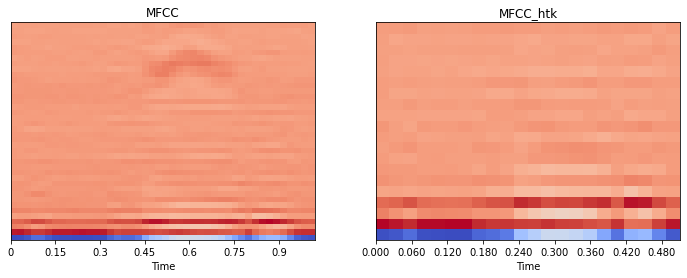

In [67]:
import librosa
import librosa.display
import os
import cv2
import numpy as np
import matplotlib.style as ms
import matplotlib.pyplot as plt
ms.use('seaborn-muted')
#extract mfccs
audio_path = "data/test/te_f_01_02.wav"
x, sr = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40)
mfccs_htk = librosa.feature.mfcc(y=x, sr=sr, hop_length=1024, htk=True)
#print & display
#print("MFCCs :", mfccs)
#print("MFCCs htk :", mfccs_htk)
print("Number of windows mfccs :",mfccs.shape[0])
print("Number of windows mfccs_htk :",mfccs_htk.shape[0])
print("Length of each feature mfccs :",mfccs.shape[1])
print("Length of each feature mfccs_htk :", mfccs_htk.shape[1])
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
librosa.display.specshow(mfccs, x_axis="time", ax=ax[0])
librosa.display.specshow(mfccs_htk, x_axis="time", ax=ax[1])
ax[0].set_title("MFCC")
ax[1].set_title("MFCC_htk")
plt.show()
#Save MFCCs figure & text
with open('MFCCs_text/test/mfccs_te_f_01_02.wav.txt', 'w') as f:
    f.write("MFCCS : \n")
    f.write(str(mfccs))
    f.write("\n MFCCS_htk : \n")
    f.write(str(mfccs_htk))
    f.write("\n Number of windows mfccs :")
    f.write(str(mfccs.shape[0]))
    f.write("\n Number of windows mfccs_htk :")
    f.write(str(mfccs_htk.shape[0]))
    f.write("\n Length of each feature mfccs :")
    f.write(str(mfccs.shape[1]))
    f.write("\n Length of each feature mfccs_htk :")
    f.write(str(mfccs_htk.shape[1]))
fig.savefig('MFCCs/test/mfccs_te_f_01_02.wav.png')



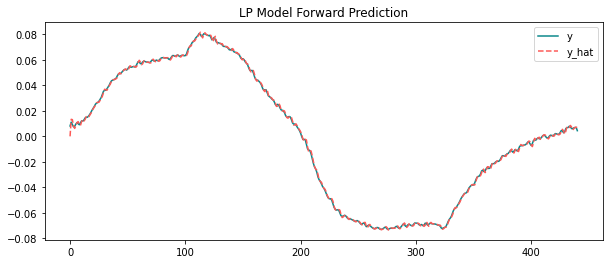

In [68]:
import matplotlib.pyplot as plt
import scipy

audio_path = "data/test/te_f_01_02.wav"

#calcute lpc
y, sr = librosa.load(audio_path, duration=0.020)
a = librosa.lpc(y, order=2)
b = np.hstack([[0], -1 * a[1:]])
y_hat = scipy.signal.lfilter(b, [1], y)

#Display lpc
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(y, color="xkcd:dark cyan")
ax.plot(y_hat, linestyle='--', color="xkcd:grapefruit")
ax.legend(['y', 'y_hat'])
ax.set_title('LP Model Forward Prediction')

#save figure
fig.savefig('LPC/test/lpc_te_f_01_02.wav.png')
